#**Maestría en Inteligencia Artificial Aplicada (MNA)**
##**Procesamiento de Lenguaje Natural (NLP)**
###Prof. Luis Eduardo Falcón Morales
###**Semana 3 - Ejercicios Complementarios - Parte 2**
### Proceso de Tokenización y Vocabulario.

###**NOTA: Estos ejercicios son simplemente para que repases los conceptos de esta semana.**
###**No es una tarea o actividad que debas entregar.**

##**1 - Ejemplo de Tokenización y preparación/limpieza de documentos**

De manera general, recuerda que para trabajar con documentos de texto debemos definir nuestras unidades mínimas de información (por ejemplo, las palabras) mediante el proceso llamado de tokenización.

Todas las técnicas regex, stemming y lemmatization vistas hasta ahora nos ayudan a simplificar y normalizar documentos de texto de entrada. Un vez hecho esto, se busca extraer la información de estas unidades mínimas de información obtenidas con estas técnicas de tokenización y normalización.

Así, una vez sabiendo como tokenizar un documento, se procede a contruir lo que llamaremos el vocabulario y el diccionario de un conjunto de documentos o corpus.

Aunque hay variaciones en la forma en que se definen estos conceptos, en general el vocabulario será el conjunto de palabras/tokens que solo serán tomados en cuenta durante el análisis de los documentos. Es decir, solamente estos tokens o palabras son las que existirán para nosotros, todo lo demás se desecha.

Por su parte, usaremos el tipo de dato diccionario en Python para asociar a cada palabra con su frecuencia de uso, o bien asociarla a la clase que pertenece en un problema de clasificación.

A continuación veremos primero de manera "manual" cómo realizar dicho proceso y al final veremos cómo realizar lo mismo con algunas de las librerías existentes.

Veamos este ejemplo muy sencillo para entender la manera en que se construye un vocabulario, un diccionario y la vectorización de los enunciados.

Lo iremos haciendo paso a paso para ir explicando cada etapa y vaya quedando claro el significado de cada uno de los conceptos.

Supongamos que tenemos la siguiente lista de comentarios en un problema de clasificación, donde cada uno está etiquetado como comentario positivo con un 1, o como comentario negativo con un 0.

In [14]:
docs = [['Muy bien hecho lo hecho.', 1],
        ['¡Excelente trabajo muchacho!', 1],
        ['Sigue como hasta ahora muchacho.', 1],
        ['Lo hiciste muy bien.', 1],
        ['¡¡Excelente resultado!!', 1],
        ['¡¡¡Pésimo trabajo muchacho!!!', 0],
        ['Que mal desempeño.', 0],
        ['Muy mal hecho muchacho.', 0],
        ['¡Que trabajo tan pobre!', 0],
        ['No está bien, nada bien, muchacho.', 0]]

##**2 - Limpieza: solo caracteres alfabéticos**

Por el momento supongamos que solamente nos interesa conservar lo que son caracteres alfabéticos. 

Entonces podemos proceder como sigue:

In [15]:
import re

In [16]:
X = []

for doc in docs:
  words = re.sub(r'[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]', ' ', doc[0])   # Solo consideramos caracteres letras, observa que lo extendemos al español.
  words = re.sub(r'\s{2,}', ' ', words.strip())      # Eliminemos espacios en blanco extras entre palabras o al inicio o final de cada frase.
  X.append(words)

# Observa el resultado obtenido:
X

['Muy bien hecho lo hecho',
 'Excelente trabajo muchacho',
 'Sigue como hasta ahora muchacho',
 'Lo hiciste muy bien',
 'Excelente resultado',
 'Pésimo trabajo muchacho',
 'Que mal desempeño',
 'Muy mal hecho muchacho',
 'Que trabajo tan pobre',
 'No está bien nada bien muchacho']

In [17]:
# Guardemos las etiquetas de cada enunciado en una variable aparte "y":

y = [t for _,t in docs]

y

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

##**3 - Tokenización**

Ahora podemos pasar a tokenizar cada enunciado. 

En este ejemplo tokenizemos con respecto a las palabras, como se muestra a continuación y aprovechamos para transformar todo a minúsculas:

In [18]:
Xtok = [x.lower().split() for x in X]

Xtok

[['muy', 'bien', 'hecho', 'lo', 'hecho'],
 ['excelente', 'trabajo', 'muchacho'],
 ['sigue', 'como', 'hasta', 'ahora', 'muchacho'],
 ['lo', 'hiciste', 'muy', 'bien'],
 ['excelente', 'resultado'],
 ['pésimo', 'trabajo', 'muchacho'],
 ['que', 'mal', 'desempeño'],
 ['muy', 'mal', 'hecho', 'muchacho'],
 ['que', 'trabajo', 'tan', 'pobre'],
 ['no', 'está', 'bien', 'nada', 'bien', 'muchacho']]

Observa cómo vamos aislando y quedándonos con los tokens (palabras) que estamos considerando nos darán la mayor cantidad de información, en relación al significado de cada frase.

##**4 - stopwords**



Otra de las etapas importantes en el proceso de limpieza y preparación puede ser la eliminación de las stopwords. 

Supongamos que eliminamos el conjunto de stopwords indicados a continuación:

In [19]:
mis_stopwords = ['a', 'lo', 'que', 'está', 'hasta', 'el', 'la']

Xclean = []

for x in Xtok:
  for t in x:
    if t in mis_stopwords:    
      x.remove(t)           # aquellos tokens que estén en los stopwords, las removemos.
  Xclean.append(x)

Xclean

[['muy', 'bien', 'hecho', 'hecho'],
 ['excelente', 'trabajo', 'muchacho'],
 ['sigue', 'como', 'ahora', 'muchacho'],
 ['hiciste', 'muy', 'bien'],
 ['excelente', 'resultado'],
 ['pésimo', 'trabajo', 'muchacho'],
 ['mal', 'desempeño'],
 ['muy', 'mal', 'hecho', 'muchacho'],
 ['trabajo', 'tan', 'pobre'],
 ['no', 'bien', 'nada', 'bien', 'muchacho']]

##**5 - Vocabulario**

In [20]:
vocab = []

for x in Xclean:     # Agregamos los tokens de cada enunciado a nuestro vocabulario.
  vocab.extend(x)    # Investiga la diferencia entre el método "append()" y "extend()".

vocab = list(set(vocab))   # Consideramos el vocabulario generado como tipo de dato conjunto (set), 
                           # para contabilizarlos solo 1 vez y lo volvemos a considerar como lista.

vocab.sort()      # conviene ordenarlo de manera alfabética.
print('Tamaño del vocabulario:', len(vocab))
print('\nVocabulario:', vocab)

Tamaño del vocabulario: 18

Vocabulario: ['ahora', 'bien', 'como', 'desempeño', 'excelente', 'hecho', 'hiciste', 'mal', 'muchacho', 'muy', 'nada', 'no', 'pobre', 'pésimo', 'resultado', 'sigue', 'tan', 'trabajo']


Así, hemos construido nuestro vocabulario con solo 18 palabras (tokens).

Es decir, si este fuera finalmente nuestro vocabulario, en adelante todos los enunciados que analicemos deberán filtrarse y cualquier palabra fuera de este conjunto, deberá eliminarse. 

En particular, para problemas de análisis de sentimiento, este conjunto de palabras de nuestro vocabulario debiera ser suficiente para determinar si un enunciado se clasifica de manera positiva o negativa, de aquí la importancia de generar un buen vocabulario.

Más adelante veremos que los vocabularios pueden llegar a ser muy grandes (cientos de miles de palabras y en ocasiones de millones). Esto implicará el requerimiento de más recursos computacionales, que en muchas ocasiones solo los encontraremos con algunas de las soluciones en la nube. Por ello será importante realizar todas estas etapas de pre-procesamiento de texto, para tener solamente aquellos tokens que realmente necesitemos.


---





##**6 - Diccionario: Frecuencia de los tokens**

Una manera muy sencilla de medir la importancia de una palabra (token), pero en ocasiones bastante poderosa, es determinar su frecuencia de uso en los documentos.

Habiendo eliminado las stopwords, podemos suponer que las palabras de mayor frecuencia son las que estarán aportando mayor información en la búsqueda del significado de un enunciado. 

Como una primera aproximación, la frecuencia será una primera forma de medir la importancia de las palabras, pero más adelante estudiaremos otros métodos mucho más poderosos.

Por el momento costruyamos nuestro diccionario considerando las palabras (tokens) como las llaves (keys) y su frecuencia de aparición como los valores (values). 

In [21]:
dicc = {}   # construyamos un diccionario de la forma {key:value} --> {word:freq}

for x in Xclean:     # Tomamos cada comentario ya filtrado o procesado.
  for w in x:        # Y ahora cada token de un comentario.

    if w in dicc:    # Verificamos si cada llave w ya la incluímos al diccionario.
      dicc[w] += 1   # Si ya está incluída, aumentamos en 1 su frecuencia de uso.
    else:
      dicc[w] = 1    # De lo contrario, si es la primera vez que aparece, la contabilizamos con 1.

dicc

{'muy': 3,
 'bien': 4,
 'hecho': 3,
 'excelente': 2,
 'trabajo': 3,
 'muchacho': 5,
 'sigue': 1,
 'como': 1,
 'ahora': 1,
 'hiciste': 1,
 'resultado': 1,
 'pésimo': 1,
 'mal': 2,
 'desempeño': 1,
 'tan': 1,
 'pobre': 1,
 'no': 1,
 'nada': 1}

Observa que este diccionario nos está diciendo cuáles palabras han estado apareciendo con mayor frecuencia en los documentos. 

En particular podemos observar palabras como "muchacho", "bien", "muy" como las de mayor frecuencia.

En este paso es muy común hacer otro filtrado del vocabulario, considerando por ejemplo solo aquellas palabras que tienen una frecuencia de uso mínima a cierto valor predeterminado. Por ejemplo, si tenemos miles de comentarios, se pueden filtrar sin pérdida de información, aquellas palabras que solamente aparecieron 2 o 3 veces, por decir algo. 

También es común filtrar los tokens a aquellos de longitud mayor o igual a 2. Letras o tokens de longitud 1, seguramente no dan mucha información en general en un enunciado.

Todas esta decisiones y muchas de las que siguen en esta etapa de pre-procesamiento de los datos, las debe de tomar el analista con base a su experiencia de qué podría funcionar mejor. Es precisamente a través de estos ejemplos y problemas que estaremos analizando durante el presente curso, que podrás ir ganando experiencia.


##**7 - Diccionarios como Bolsa-de-Palabras (BOW : Bag-Of-Words)**

Ya vimos que el diccionario nos habla de la frecuencia de uso de cada palabra en todos los documentos que tenemos.

Sin embargo, si cada documento lo tenemos etiquetado como de clase positiva o negativa, podemos generar diccionarios para cada tipo de enunciado. 

De esta manera podemos tener una idea de qué palabras o tokens son las que más se utilizan en comentarios positivos y cuales palabras o tokens en los comentarios negativos.

A este concepto se le suele llamar bolsa de palabras, BOW, por sus siglas en inglés. De esta manera podemos tener la "bolsa de palabras" que usualmente se usan con los comentarios positivos y la "bolsa de palabras" de los comentarios negativos.

En muchas ocasiones, con solo determinar a qué bolsa de palabras pertenecen las palabras de un enunciado, puede ser suficiente para determinar con una alta probabilidad, si el enunciado en cuestión se puede clasificar como positivo o negativo.

Construyamos a continuación la bolsa de palabras de cada uno de nuestros enunciados que tenemos previamente clasificados como positivos (1) y negativos (0). 

Recordemos que los enunciados ya filtrados los tenemos en la variable/lista Xclean y sus etiquetas en la variable/lista "y".

In [22]:
for x,c in zip(Xclean, y):     # Imprimimos cada enunciado con su etiqueta de comentario positivo (1) o comentario negativo (0).
  print(x,c)              

['muy', 'bien', 'hecho', 'hecho'] 1
['excelente', 'trabajo', 'muchacho'] 1
['sigue', 'como', 'ahora', 'muchacho'] 1
['hiciste', 'muy', 'bien'] 1
['excelente', 'resultado'] 1
['pésimo', 'trabajo', 'muchacho'] 0
['mal', 'desempeño'] 0
['muy', 'mal', 'hecho', 'muchacho'] 0
['trabajo', 'tan', 'pobre'] 0
['no', 'bien', 'nada', 'bien', 'muchacho'] 0


In [23]:
freqs = {}       # Construyamos un diccionario de la forma: {key:value} --> {tupla:freq_class} --> {(word,class):freq_class}

for x, c in zip(Xclean, y):    # Iniciamos con cada frase "x", con su etiqueta o clase "c". 
  for w in x:                  # Analicemos token por token "w".  

    pair = (w,c)               # Formamos la tupla (token, etiqueta_clase) 
    if pair in freqs:          # Si dicha tupla ya está en el diccionario,
      freqs[pair] += 1         # le incrementamos su frecuencia en 1,
    else:
      freqs[pair] = 1          # de lo contrario la inicializamos con 1.

freqs

{('muy', 1): 2,
 ('bien', 1): 2,
 ('hecho', 1): 2,
 ('excelente', 1): 2,
 ('trabajo', 1): 1,
 ('muchacho', 1): 2,
 ('sigue', 1): 1,
 ('como', 1): 1,
 ('ahora', 1): 1,
 ('hiciste', 1): 1,
 ('resultado', 1): 1,
 ('pésimo', 0): 1,
 ('trabajo', 0): 2,
 ('muchacho', 0): 3,
 ('mal', 0): 2,
 ('desempeño', 0): 1,
 ('muy', 0): 1,
 ('hecho', 0): 1,
 ('tan', 0): 1,
 ('pobre', 0): 1,
 ('no', 0): 1,
 ('bien', 0): 2,
 ('nada', 0): 1}

Observa que los primeros 10 elementos son parte de la bolsa de palabras de los comentarios positivos.

La forma en que se lee cada uno de estos elementos es como sigue:

Por ejemplo, el elemento ('muy',1):2 nos dice que la palabra "muy" apareció 2 veces en los comentarios positivos. Y esa misma palabra, "muy", apreció 1 vez en los comentarios negativos, esto por el elemento: ('muy',0):1.

Otro caso, ('muchacho',1):2, nos dice que la palabra "muchacho" se usó 2 veces en los comentarios positivos. 

Y por ('muchacho',0):3, sabemos que la misma palabra se utilizó 3 veces en los comentarios negativos.



##**8 - Nube de palabras (word cloud)**

Una vez identificadas las palabras con sus frecuencias de uso por tipo de comentario, positivo o negativo, podemos generar una nube de palabras para cada clase.

Las nubes de palabras son un apoyo visual para identificar de manera rápida algunos de los tokens más relevantes por cada clase.

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [25]:
pos_tok=[]  # inicializamos listas de los tokens positivos y negativos
neg_tok=[] 

for x,c in zip(Xclean, y):   
  if c==1:
    pos_tok.extend(x)   # tokens usados en comentarios positivos
  else: 
    neg_tok.extend(x)   # tokens usados en comentarios negativos

pt = ' '.join(pos_tok)   # requerimos un solo string por cada clase para la nube de palabras.
nt = ' '.join(neg_tok)

print('String de los comentarios/tokens filtrados positivos:\n', pt)
print('\nString de los comentarios/tokens filtrados negativos:\n', nt)

String de los comentarios/tokens filtrados positivos:
 muy bien hecho hecho excelente trabajo muchacho sigue como ahora muchacho hiciste muy bien excelente resultado

String de los comentarios/tokens filtrados negativos:
 pésimo trabajo muchacho mal desempeño muy mal hecho muchacho trabajo tan pobre no bien nada bien muchacho


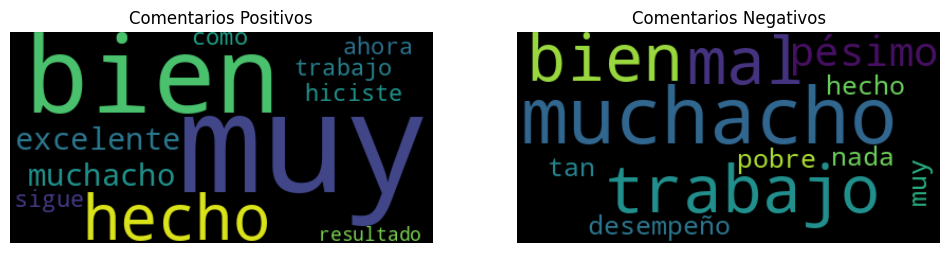

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))

# Nube de palabras de comentarios positivos:
wordcloudnn = WordCloud().generate(pt)
ax1.imshow(wordcloudnn, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Comentarios Positivos')

# Nube de palabras de comentarios negativos:
wordcloudnn = WordCloud().generate(nt)
ax2.imshow(wordcloudnn, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Comentarios Negativos')

plt.show()


##**9 - Vectorización de documentos**

Una parte primordial que estudiaremos en próximas semanas es la representación vectorial tanto de los documentos/enunciados, como de las palabras/tokens.

Cuando hablábamos del proceso de tokenización, mencionamos que se busca asociar a estas unidades mínimas de información con algo más informativo que solo un escalar. Es aquí donde podemos empezar a asociar un vector a cada enunciado/documento, o bien a cada palabra/token. Es claro que un vector contiene mucho mayor información que solo un escalar.

Con todo lo construído hasta ahora, vocabulario y tokenización de los enunciados, podemos vectorizar ahora dichos enunciados como sigue:



In [27]:
Xclean   # recordemos nuestra tokenización de cada enunciado/documento.

[['muy', 'bien', 'hecho', 'hecho'],
 ['excelente', 'trabajo', 'muchacho'],
 ['sigue', 'como', 'ahora', 'muchacho'],
 ['hiciste', 'muy', 'bien'],
 ['excelente', 'resultado'],
 ['pésimo', 'trabajo', 'muchacho'],
 ['mal', 'desempeño'],
 ['muy', 'mal', 'hecho', 'muchacho'],
 ['trabajo', 'tan', 'pobre'],
 ['no', 'bien', 'nada', 'bien', 'muchacho']]

In [28]:
for k,w in enumerate(vocab):     # Igualmente recordemos cómo está indexado cada una de las 18 palabras/términos/tokens del vocabulario.
  print(k,w)        # La palabra/token "w" de índice "k", estará relacionada con la coordenada "k" del vector
                    # que asociemos a un enunciado/documento.

0 ahora
1 bien
2 como
3 desempeño
4 excelente
5 hecho
6 hiciste
7 mal
8 muchacho
9 muy
10 nada
11 no
12 pobre
13 pésimo
14 resultado
15 sigue
16 tan
17 trabajo


Entonces, lo que haremos ahora es asociar a cada enunciado/documento un vector de 18 coordenadas, que es la longitud del vocabulario generado. Y la posición $k$-$ésima$ de cada coordenada de cada vector/arreglo/enunciado, estará asociada al índice $k$-$ésimo$ de la palabra/término/token del vocabulario. 

Finalmente, el valor asignado a la coordenada $k$-$ésima$ del vector asociado a un enunciado, será la frecuencia de aparición en dicho enunciado de la palabra/token de índice $k$ en el vocabulario. 

En este tipo de vectorización se está representando el número de veces que aparece cada palabra del vocabulario en un enunciado, sin embargo no toma en cuenta la posición de cada palabra dentro del eneunciado. Por ello, usualmente suele referirse a esta representación vectorial como vectores bag-of-words.

Cuando estudiemos técnicas de aprendizaje profundo (deep learning) en próximas semanas, analizaremos otro tipo de representación vectorial que sí toma en cuenta la posición de una palabra dentro del enunciado en que aparece.

Pero por ahora veamos cómo obtener estos vectores bag-of-words (BOW):

In [29]:
import numpy as np

In [30]:
for x in Xclean:            # Consideremos cada enunciado de nuestros enunciados/documentos que hemos ya limpiado.
  bow_vector = np.zeros(len(vocab))     # Inicializamos: para cada enunciado/documento le asociaremos un vector del tamaño 
                                        # la cantidad de palabras/tokens en el vocabulario.

  for w in x:      # Consideremos cada palabra/token de cada enunciado.
    for k,word in enumerate(vocab):          # Y también extraemos cada palabra/token con su índice, del diccionario.
      if word==w:                 
        bow_vector[k] += 1            # Cuando la palabra/token de índice "k" del vocabulario coincide con la palabra/token del enunciado,
                                      # se incrementa su frecuencia de aparición en 1.

  print('{0}\n{1}\n'.format(x, bow_vector))         # Veamos cómo va quedando cada enunciado y su vector asociado.

['muy', 'bien', 'hecho', 'hecho']
[0. 1. 0. 0. 0. 2. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

['excelente', 'trabajo', 'muchacho']
[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

['sigue', 'como', 'ahora', 'muchacho']
[1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

['hiciste', 'muy', 'bien']
[0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

['excelente', 'resultado']
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

['pésimo', 'trabajo', 'muchacho']
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]

['mal', 'desempeño']
[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

['muy', 'mal', 'hecho', 'muchacho']
[0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

['trabajo', 'tan', 'pobre']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.]

['no', 'bien', 'nada', 'bien', 'muchacho']
[0. 2. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]



Observa que a cada enunciado se le asignó un vector de 18 coordenadas, porque en este ejemplo tenemos 18 palabras/tokens en nuestro vocabulario. 

En particular, el vector asociado al último enunciado [ no, bien, nada, bien, muchacho ] tendrá valores cero en sus coordendas, excepto por las posiciones/coordenadas con índice 1 (por la palabra "bien"), con índice 8 (por la palabra "muchacho"), con índice 10 (por la palabra "nada") y con índice 11 (por la palabra " no"). Como la palabra "bien" aparece 2 veces en este enunciado, se tiene el valor de 2 en esta coordenada.

Por último, cabe mencionar que estos 10 vectores con 18 coordenadas cada uno y acomodados en forma matricial para que cada uno de ellos sea un renglón, formarán lo que más adelante llamaremos la Matriz-Documento-Término, abreviada DTM, por sus siglas en inglés "Document-Term-Matrix".

Habrás observado que durante estos ejercicios he hecho referencia a la palabra "término", escribiendo en ocasiones "palabras/tokens/términos". Es por esta razón, para irnos familiarizando con todos estos conceptos a los cuales se les hace referencia de diferentes formas.

##**10 - La Document-Term-Matrix (DTM)**


Sobra decir que muchas de las representaciones que hemos obtenido hasta ahora las podremos obtener con apoyo de diferentes librerías. Sin embargo, hicimos este ejercicio de manera detallada porque todos estos conceptos son muy importantes para lo que estaremos estudiando más adelante y debe quedarte muy claro el significado de todos ellos.

En particular, veamos cómo obtener esta última matriz que se llama Document-Term-Matrix (DTM) en inglés, con apoyo de librerías y métodos que optimizan y facilitan su obtención. 

La próxima semana retomaremos con mayor detalle el estudio de la DTM debido a su importancia para lo que seguiremos estudiando.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

Para obtener la matriz DTM con apoyo del método CountVectorizer(), requerimos que cada documento/enunciado esté en un solo string. 

Una vez hecho esto, obtenemos la matriz de manera directa como se muestra a continuación:

In [32]:
Xx = []  

for x in Xclean:
  Xx.append(' '.join(x))

Xx

['muy bien hecho hecho',
 'excelente trabajo muchacho',
 'sigue como ahora muchacho',
 'hiciste muy bien',
 'excelente resultado',
 'pésimo trabajo muchacho',
 'mal desempeño',
 'muy mal hecho muchacho',
 'trabajo tan pobre',
 'no bien nada bien muchacho']

In [33]:
vectorizer = CountVectorizer()  

DTM = vectorizer.fit_transform(Xx)

print(DTM.toarray())

[[0 1 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1]
 [0 2 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0]]


¡Observa que son exactmente los mismos vectores y valores en cada coordenada que los que obtuvimos paso a paso!

Observaremos que en general estas matrices son lo que se llaman dispersas (sparse matrices en inglés), es decir, que tendrán una gran cantidad de ceros. Ello llevará a buscar representaciones que faciliten y aceleren las operaciones durante su manejo.

Las próximas semanas platicamos más al respecto de estas matrices, pero finalmente también observa que no solo los renglones se pueden ver como representaciones vectoriales de cada enunciado, sino que también cada columna se podrá ver como una representación vectorial de cada palabra/token.

##**Fin de la Parte 2 de los ejercicios complementarios de la Semana 3**